# Supervised Learning Capstone Project - Tree Methods Focus 



## Make sure to review the introduction video to understand the 3 ways of approaching this project exercise!

----

**Ways to approach the project:**
   1. Open a new notebook, read in the data, and then analyze and visualize whatever you want, then create a predictive model.
   2. Use this notebook as a general guide, completing the tasks in bold shown below.
   3. Skip to the solutions notebook and video, and treat project at a more relaxing code along walkthrough lecture series.

------
------

## GOAL: Create a model to predict whether or not a customer will Churn .

----
----


## Complete the Tasks in Bold Below!

## Part 0: Imports and Read in the Data

**TASK: Run the filled out cells below to import libraries and read in your data. The data file is "Telco-Customer-Churn.csv"**

In [1]:
import pyforest
%matplotlib inline

In [3]:
df = pd.read_csv("Telco-Customer-Churn.csv")

<IPython.core.display.Javascript object>

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [5]:
df.shape

(7032, 21)

In [6]:
df.columns = df.columns.str.lower()
# columns adlarını küçük harflerle oluşturuyoruz.

## Part 1: Quick Data Check

**TASK: Confirm quickly with .info() methods the datatypes and non-null values in your dataframe.**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   seniorcitizen     7032 non-null   int64  
 3   partner           7032 non-null   object 
 4   dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   phoneservice      7032 non-null   object 
 7   multiplelines     7032 non-null   object 
 8   internetservice   7032 non-null   object 
 9   onlinesecurity    7032 non-null   object 
 10  onlinebackup      7032 non-null   object 
 11  deviceprotection  7032 non-null   object 
 12  techsupport       7032 non-null   object 
 13  streamingtv       7032 non-null   object 
 14  streamingmovies   7032 non-null   object 
 15  contract          7032 non-null   object 
 16  paperlessbilling  7032 non-null   object 


**TASK: Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.**

In [8]:
df.describe(include="all").T.sort_values("unique")
# include="all" bize kategorik sütunların da gösterimini sağlıyor.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
churn,7032,2,No,5163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7032,2,Male,3549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
partner,7032,2,No,3639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dependents,7032,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
phoneservice,7032,2,Yes,6352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paperlessbilling,7032,2,Yes,4168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contract,7032,3,Month-to-month,3875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
streamingmovies,7032,3,No,2781,NaN,NaN,NaN,NaN,NaN,NaN,NaN
streamingtv,7032,3,No,2809,NaN,NaN,NaN,NaN,NaN,NaN,NaN
techsupport,7032,3,No,3472,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.apply(lambda x: x.nunique()) # no need if you use describe with "all"

customerid          7032
gender                 2
seniorcitizen          2
partner                2
dependents             2
tenure                72
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
monthlycharges      1584
totalcharges        6530
churn                  2
dtype: int64

# Part 2:  Exploratory Data Analysis

## General Feature Exploration

**TASK: Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [10]:
df.isnull().sum().any()

False

**TASK:Display the balance of the class labels (Churn) with a Count Plot.**

In [11]:
print(df["churn"].value_counts())

No     5163
Yes    1869
Name: churn, dtype: int64


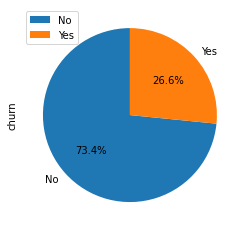

In [12]:
df["churn"].value_counts().plot(kind="pie",autopct='%1.1f%%', legend =True, startangle=90);
# another view with percentage

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

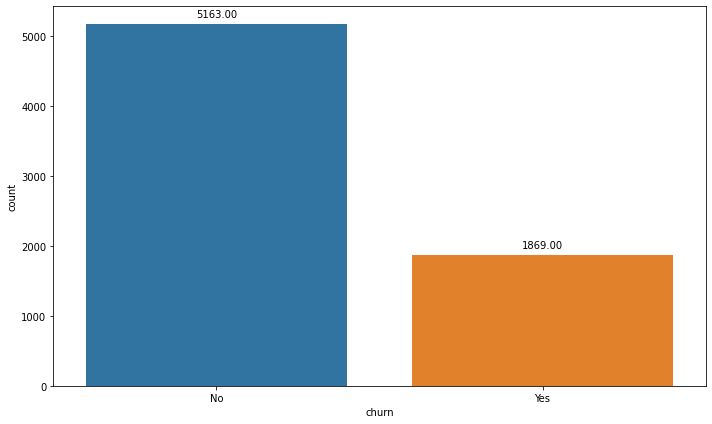

In [13]:
plt.figure(figsize=(10,6))
plot = sns.countplot (data=df, x="churn")
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.tight_layout()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

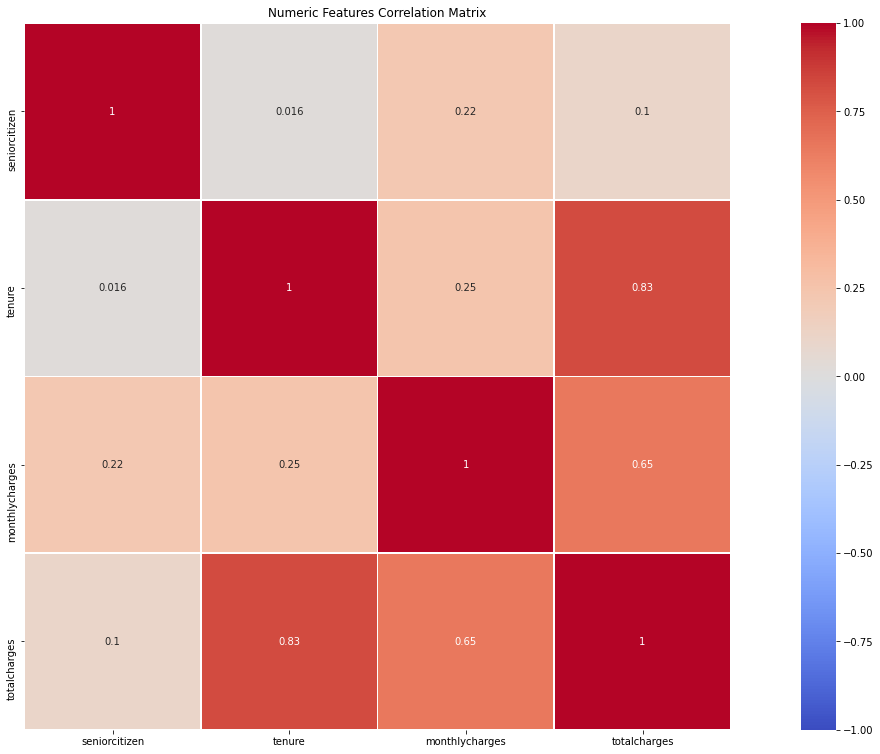

In [14]:
corr_matrix = df.corr()
plt.figure(figsize=(25, 13))
sns.heatmap(corr_matrix, square=True, annot=True, linewidths=.5, vmin=-1, vmax=1, cmap='coolwarm')
plt.title("Numeric Features Correlation Matrix")
plt.show()

**TASK: Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

In [1]:
#pip install plotly==5.1.0


In [15]:
import plotly.express as px

In [16]:
fig = px.box(df, x="churn",y ="totalcharges",
             template="seaborn")
fig.show()

In [17]:
fig = px.violin(df, x="churn",y ="totalcharges",
             template="seaborn")
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

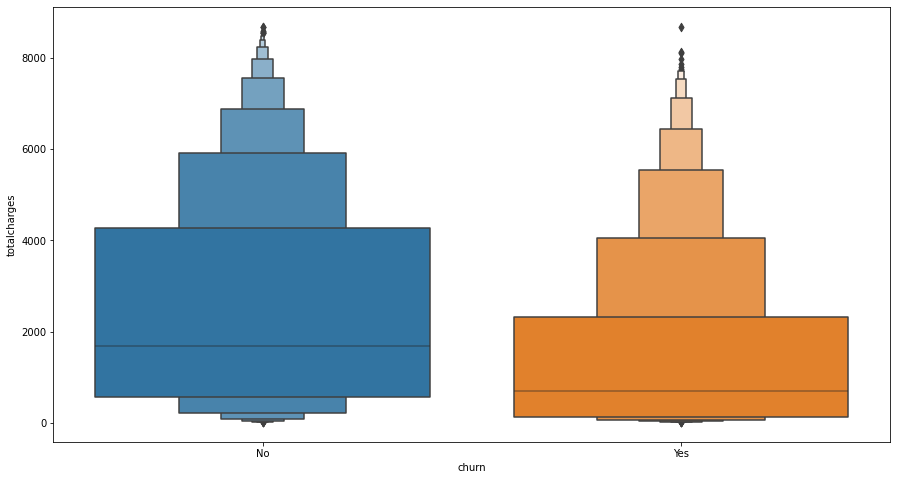

In [18]:
plt.figure(figsize=(15,8))
sns.boxenplot(data=df, x="churn", y="totalcharges");

**TASK: Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

In [19]:
fig = px.box(df, x="contract",y ="totalcharges",color="churn",
             template="seaborn")
fig.show()

**TASK: Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   seniorcitizen     7032 non-null   int64  
 3   partner           7032 non-null   object 
 4   dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   phoneservice      7032 non-null   object 
 7   multiplelines     7032 non-null   object 
 8   internetservice   7032 non-null   object 
 9   onlinesecurity    7032 non-null   object 
 10  onlinebackup      7032 non-null   object 
 11  deviceprotection  7032 non-null   object 
 12  techsupport       7032 non-null   object 
 13  streamingtv       7032 non-null   object 
 14  streamingmovies   7032 non-null   object 
 15  contract          7032 non-null   object 
 16  paperlessbilling  7032 non-null   object 


In [21]:
df.seniorcitizen = df.seniorcitizen.astype("object")

In [22]:
df.select_dtypes(exclude='number') # to see only categorical columns

,customerid,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7028,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7029,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7030,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [23]:
pd.get_dummies(df[df.select_dtypes(exclude='number').columns[1:]])
# we exclude customerid because it is unique for every row

<IPython.core.display.Javascript object>

,gender_Female,gender_Male,seniorcitizen_0,seniorcitizen_1,partner_No,partner_Yes,dependents_No,dependents_Yes,phoneservice_No,phoneservice_Yes,multiplelines_No,multiplelines_No phone service,multiplelines_Yes,internetservice_DSL,internetservice_Fiber optic,internetservice_No,onlinesecurity_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No,techsupport_No internet service,techsupport_Yes,streamingtv_No,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,churn_No,churn_Yes
0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0
7028,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0
7029,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
7030,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1


In [24]:
dummy_df = pd.get_dummies(df[df.select_dtypes(exclude='number').columns[1:]])

<IPython.core.display.Javascript object>

In [25]:
dummy_df.corr()

,gender_Female,gender_Male,seniorcitizen_0,seniorcitizen_1,partner_No,partner_Yes,dependents_No,dependents_Yes,phoneservice_No,phoneservice_Yes,multiplelines_No,multiplelines_No phone service,multiplelines_Yes,internetservice_DSL,internetservice_Fiber optic,internetservice_No,onlinesecurity_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No,techsupport_No internet service,techsupport_Yes,streamingtv_No,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,churn_No,churn_Yes
gender_Female,1.000000,-1.000000,-0.001819,0.001819,-0.001379,0.001379,0.010349,-0.010349,-0.007515,0.007515,-0.004335,-0.007515,0.008883,-0.007584,0.011189,-0.004745,-0.010859,-0.004745,0.016328,-0.008605,-0.004745,0.013093,0.003163,-0.004745,0.000807,-0.003815,-0.004745,0.008507,-0.003088,-0.004745,0.007124,-0.006078,-0.004745,0.010105,0.003251,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199,-0.008545,0.008545
gender_Male,-1.000000,1.000000,0.001819,-0.001819,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515,0.004335,0.007515,-0.008883,0.007584,-0.011189,0.004745,0.010859,0.004745,-0.016328,0.008605,0.004745,-0.013093,-0.003163,0.004745,-0.000807,0.003815,0.004745,-0.008507,0.003088,0.004745,-0.007124,0.006078,0.004745,-0.010105,-0.003251,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199,0.008545,-0.008545
seniorcitizen_0,-0.001819,0.001819,1.000000,-1.000000,0.016957,-0.016957,-0.210550,0.210550,0.008392,-0.008392,0.136377,0.008392,-0.142996,0.108276,-0.254923,0.182519,-0.185145,0.182519,0.038576,-0.087539,0.182519,-0.066663,-0.094403,0.182519,-0.059514,-0.205254,0.182519,0.060577,-0.048664,0.182519,-0.105445,-0.034196,0.182519,-0.119842,-0.137752,0.046491,0.116205,0.156258,-0.156258,0.016235,0.024359,-0.171322,0.152987,0.150541,-0.150541
seniorcitizen_1,0.001819,-0.001819,-1.000000,1.000000,-0.016957,0.016957,0.210550,-0.210550,-0.008392,0.008392,-0.136377,-0.008392,0.142996,-0.108276,0.254923,-0.182519,0.185145,-0.182519,-0.038576,0.087539,-0.182519,0.066663,0.094403,-0.182519,0.059514,0.205254,-0.182519,-0.060577,0.048664,-0.182519,0.105445,0.034196,-0.182519,0.119842,0.137752,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987,-0.150541,0.150541
partner_No,-0.001379,0.001379,0.016957,-0.016957,1.000000,-1.000000,0.452269,-0.452269,0.018397,-0.018397,0.130028,0.018397,-0.142561,0.001043,-0.001235,0.000286,0.129394,0.000286,-0.143346,0.135626,0.000286,-0.141849,0.146702,0.000286,-0.153556,0.108875,0.000286,-0.120206,0.123394,0.000286,-0.124483,0.117488,0.000286,-0.118108,0.280202,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948,-0.149982,0.149982
partner_Yes,0.001379,-0.001379,-0.016957,0.016957,-1.000000,1.000000,-0.452269,0.452269,-0.018397,0.018397,-0.130028,-0.018397,0.142561,-0.001043,0.001235,-0.000286,-0.129394,-0.000286,0.143346,-0.135626,-0.000286,0.141849,-0.146702,-0.000286,0.153556,-0.108875,-0.000286,0.120206,-0.123394,-0.000286,0.124483,-0.117488,-0.000286,0.118108,-0.280202,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948,0.149982,-0.149982
dependents_No,0.010349,-0.010349,-0.210550,0.210550,0.452269,-0.452269,1.000000,-1.000000,-0.001078,0.001078,-0.023388,-0.001078,0.024307,-0.051593,0.164101,-0.138383,0.186979,-0.138383,-0.080786,0.137421,-0.138383,-0.023639,0.128053,-0.138383,-0.013900,0.171164,-0.138383,-0.063053,0.099912,-0.138383,0.016499,0.078245,-0.138383,0.038375,0.229715,-0.069222,-0.201699,-0.110131,0.110131,-0.052369,-0.0611

In [26]:
sort_coor_Yes = dummy_df.corr().churn_Yes.sort_values(ascending= False).iloc[1:-1]
sort_coor_Yes

contract_Month-to-month                    0.404565
onlinesecurity_No                          0.342235
techsupport_No                             0.336877
internetservice_Fiber optic                0.307463
paymentmethod_Electronic check             0.301455
onlinebackup_No                            0.267595
deviceprotection_No                        0.252056
paperlessbilling_Yes                       0.191454
dependents_No                              0.163128
seniorcitizen_1                            0.150541
partner_No                                 0.149982
streamingmovies_No                         0.130920
streamingtv_No                             0.128435
streamingtv_Yes                            0.063254
streamingmovies_Yes                        0.060860
multiplelines_Yes                          0.040033
phoneservice_Yes                           0.011691
gender_Female                              0.008545
gender_Male                               -0.008545
phoneservice

In [27]:
fig = px.bar(x=sort_coor_Yes.values[-1::-1],y = sort_coor_Yes.index[-1::-1],
             template="plotly", )
fig.show()
# px (plotly) bize seaborn dan farklı olarak grafik üzerinde Zoom In, Out vb. fonksiyonlar da sağlıyor.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

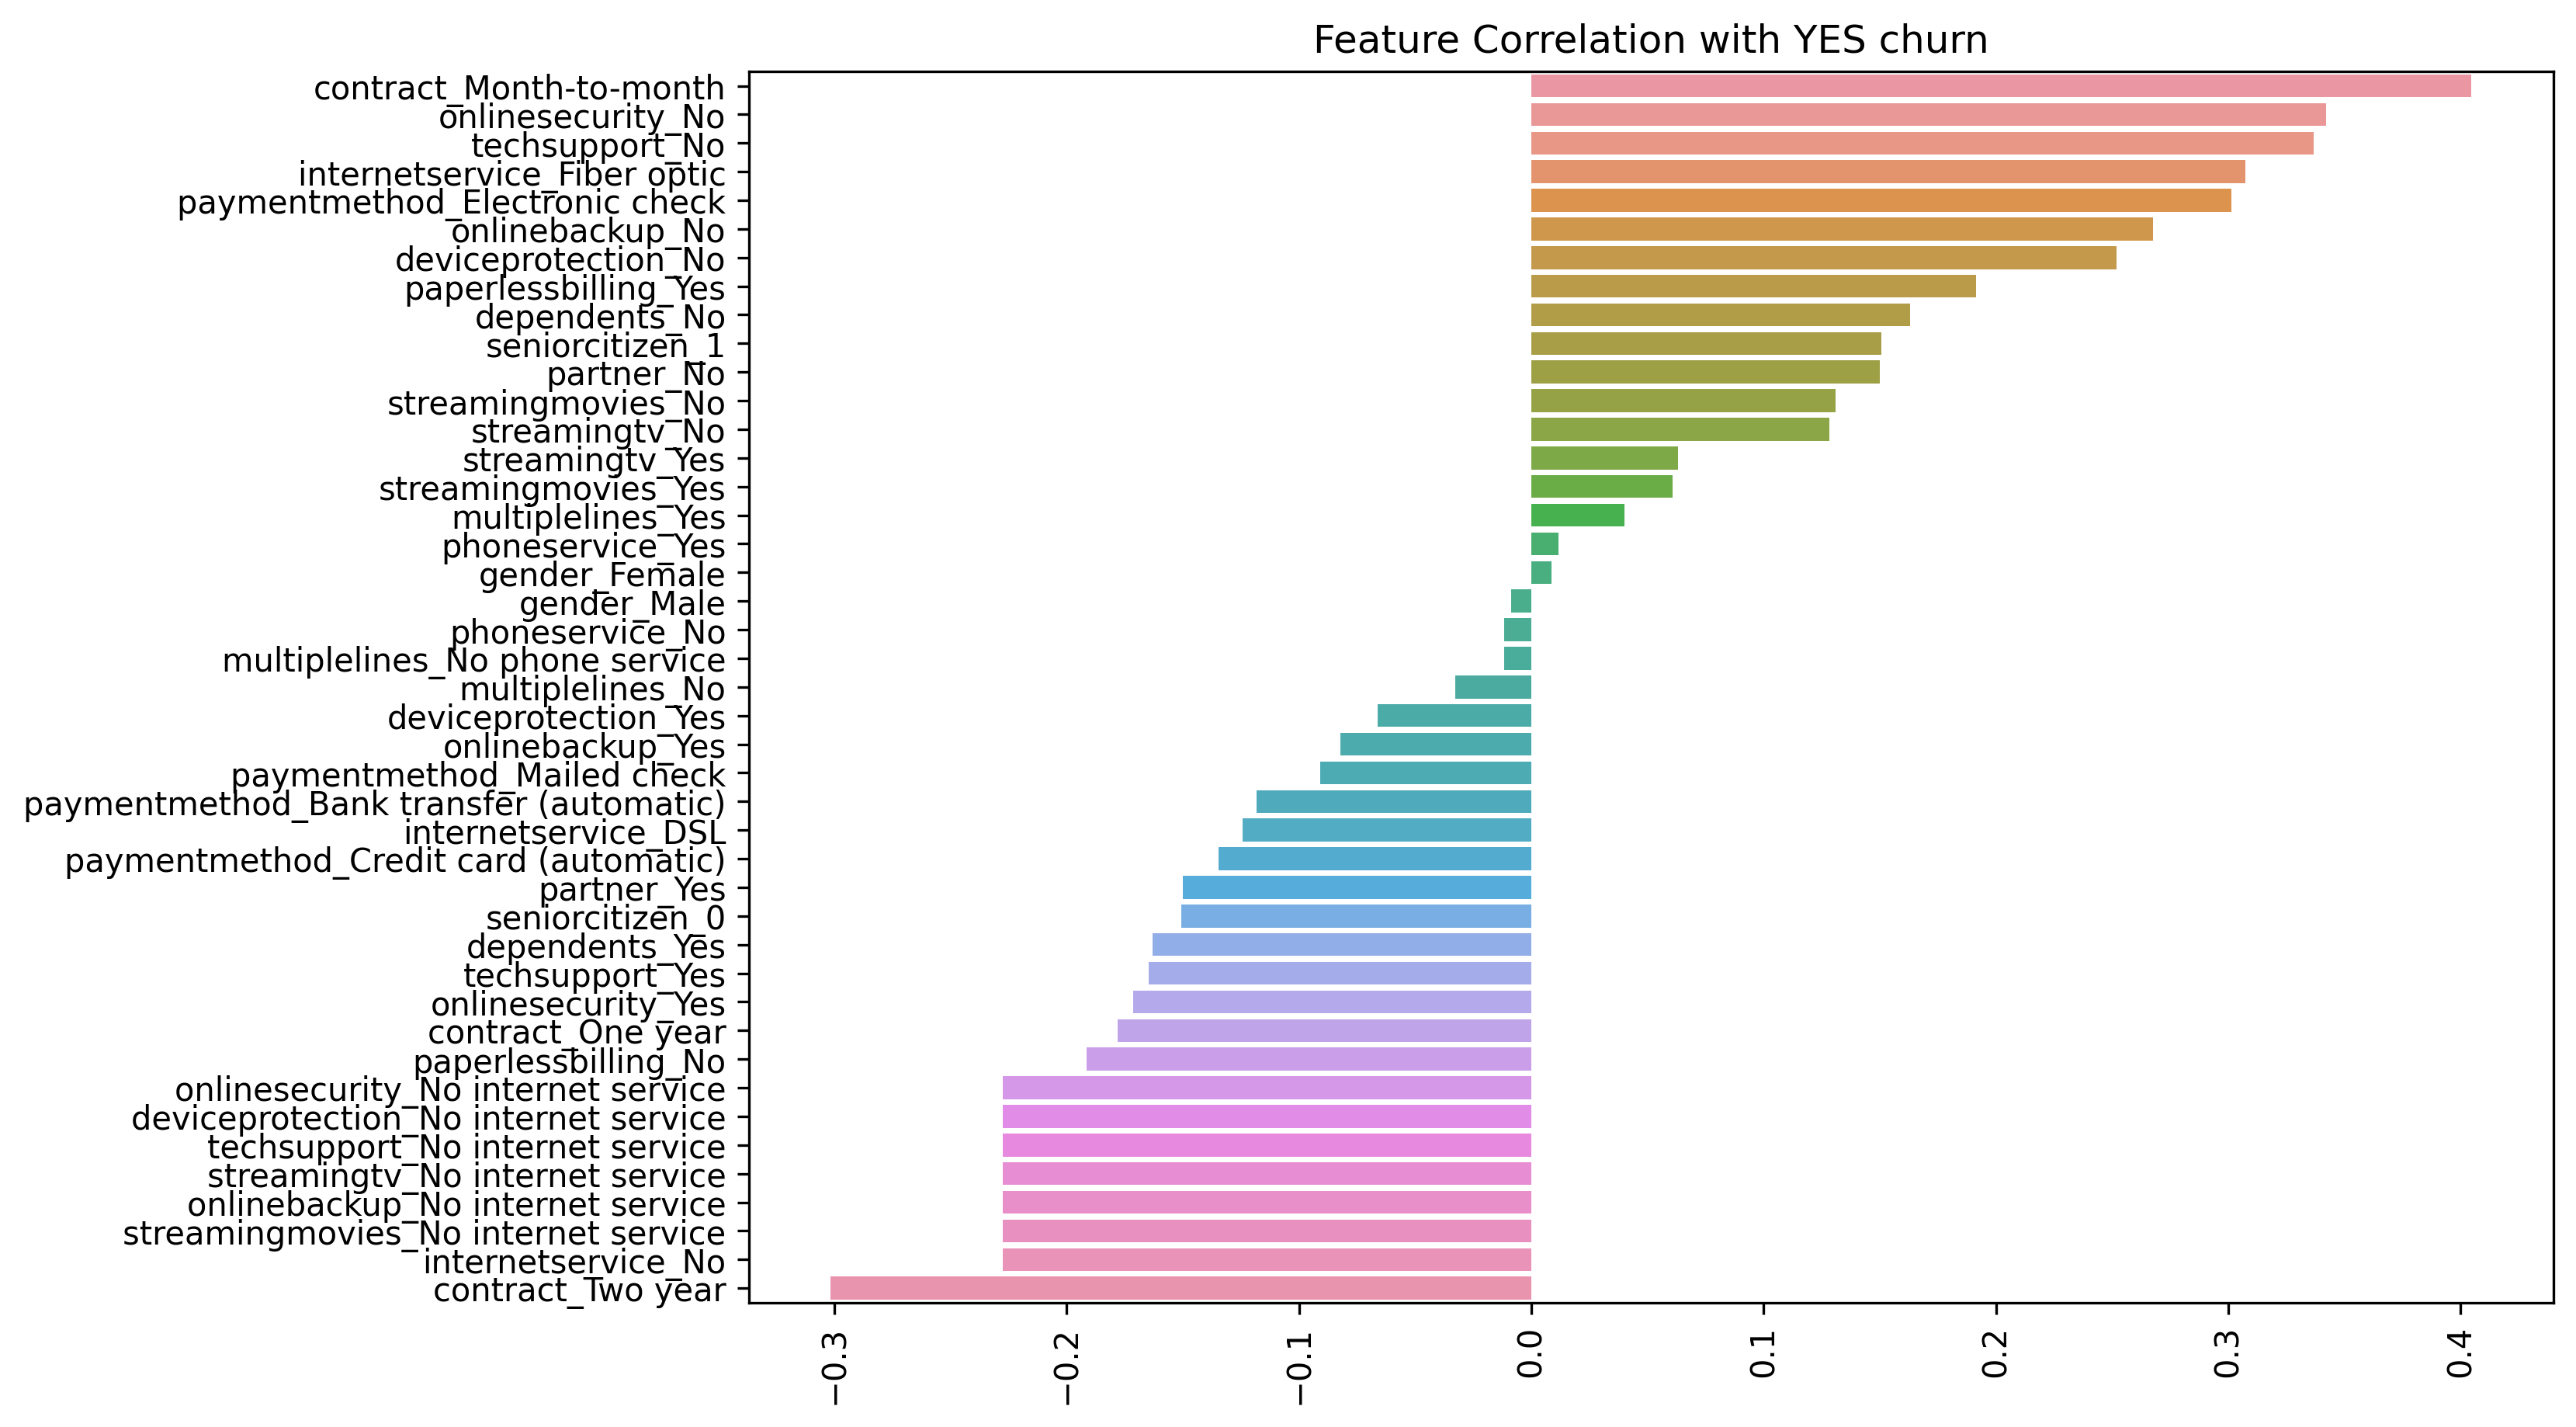

In [28]:
# senior citizen
plt.figure(figsize=(10,7), dpi=300)
plt.title("Feature Correlation with YES churn")
sns.barplot(y=sort_coor_Yes.index, x=sort_coor_Yes.values, orient="h")
plt.xticks(rotation=90);

---

References:

1. https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

2. https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V

In [29]:
import scipy.stats as sts

In [30]:
def cramers_v(x, y):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    confusion_matrix = pd.crosstab(x,y)
    chi2 = sts.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [31]:
cramers_v(dummy_df.churn_Yes,dummy_df["contract_Two year"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.30096044568438796

In [34]:
cat_core_Yes = []
for col in dummy_df.columns:
    cat_core_Yes.append(cramers_v(dummy_df.churn_Yes,dummy_df[col]))
a = pd.Series(cat_core_Yes,index=dummy_df.columns).sort_values()[:-2]
a

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

gender_Female                              0.000000
gender_Male                                0.000000
multiplelines_No phone service             0.000000
phoneservice_Yes                           0.000000
phoneservice_No                            0.000000
multiplelines_No                           0.030054
multiplelines_Yes                          0.037876
streamingmovies_Yes                        0.059347
streamingtv_Yes                            0.061787
deviceprotection_Yes                       0.064769
onlinebackup_Yes                           0.081102
paymentmethod_Mailed check                 0.089605
paymentmethod_Bank transfer (automatic)    0.117150
internetservice_DSL                        0.123236
streamingtv_No                             0.127559
streamingmovies_No                         0.130055
paymentmethod_Credit card (automatic)      0.133775
partner_Yes                                0.149194
partner_No                                 0.149194
seniorcitize

In [33]:
fig = px.bar(x=a.values,y = a.index,
             template="plotly", )
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

---

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**TASK: What are the 3 contract types available?**

In [35]:
df['contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**TASK: Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

<IPython.core.display.Javascript object>

<AxesSubplot:ylabel='Frequency'>

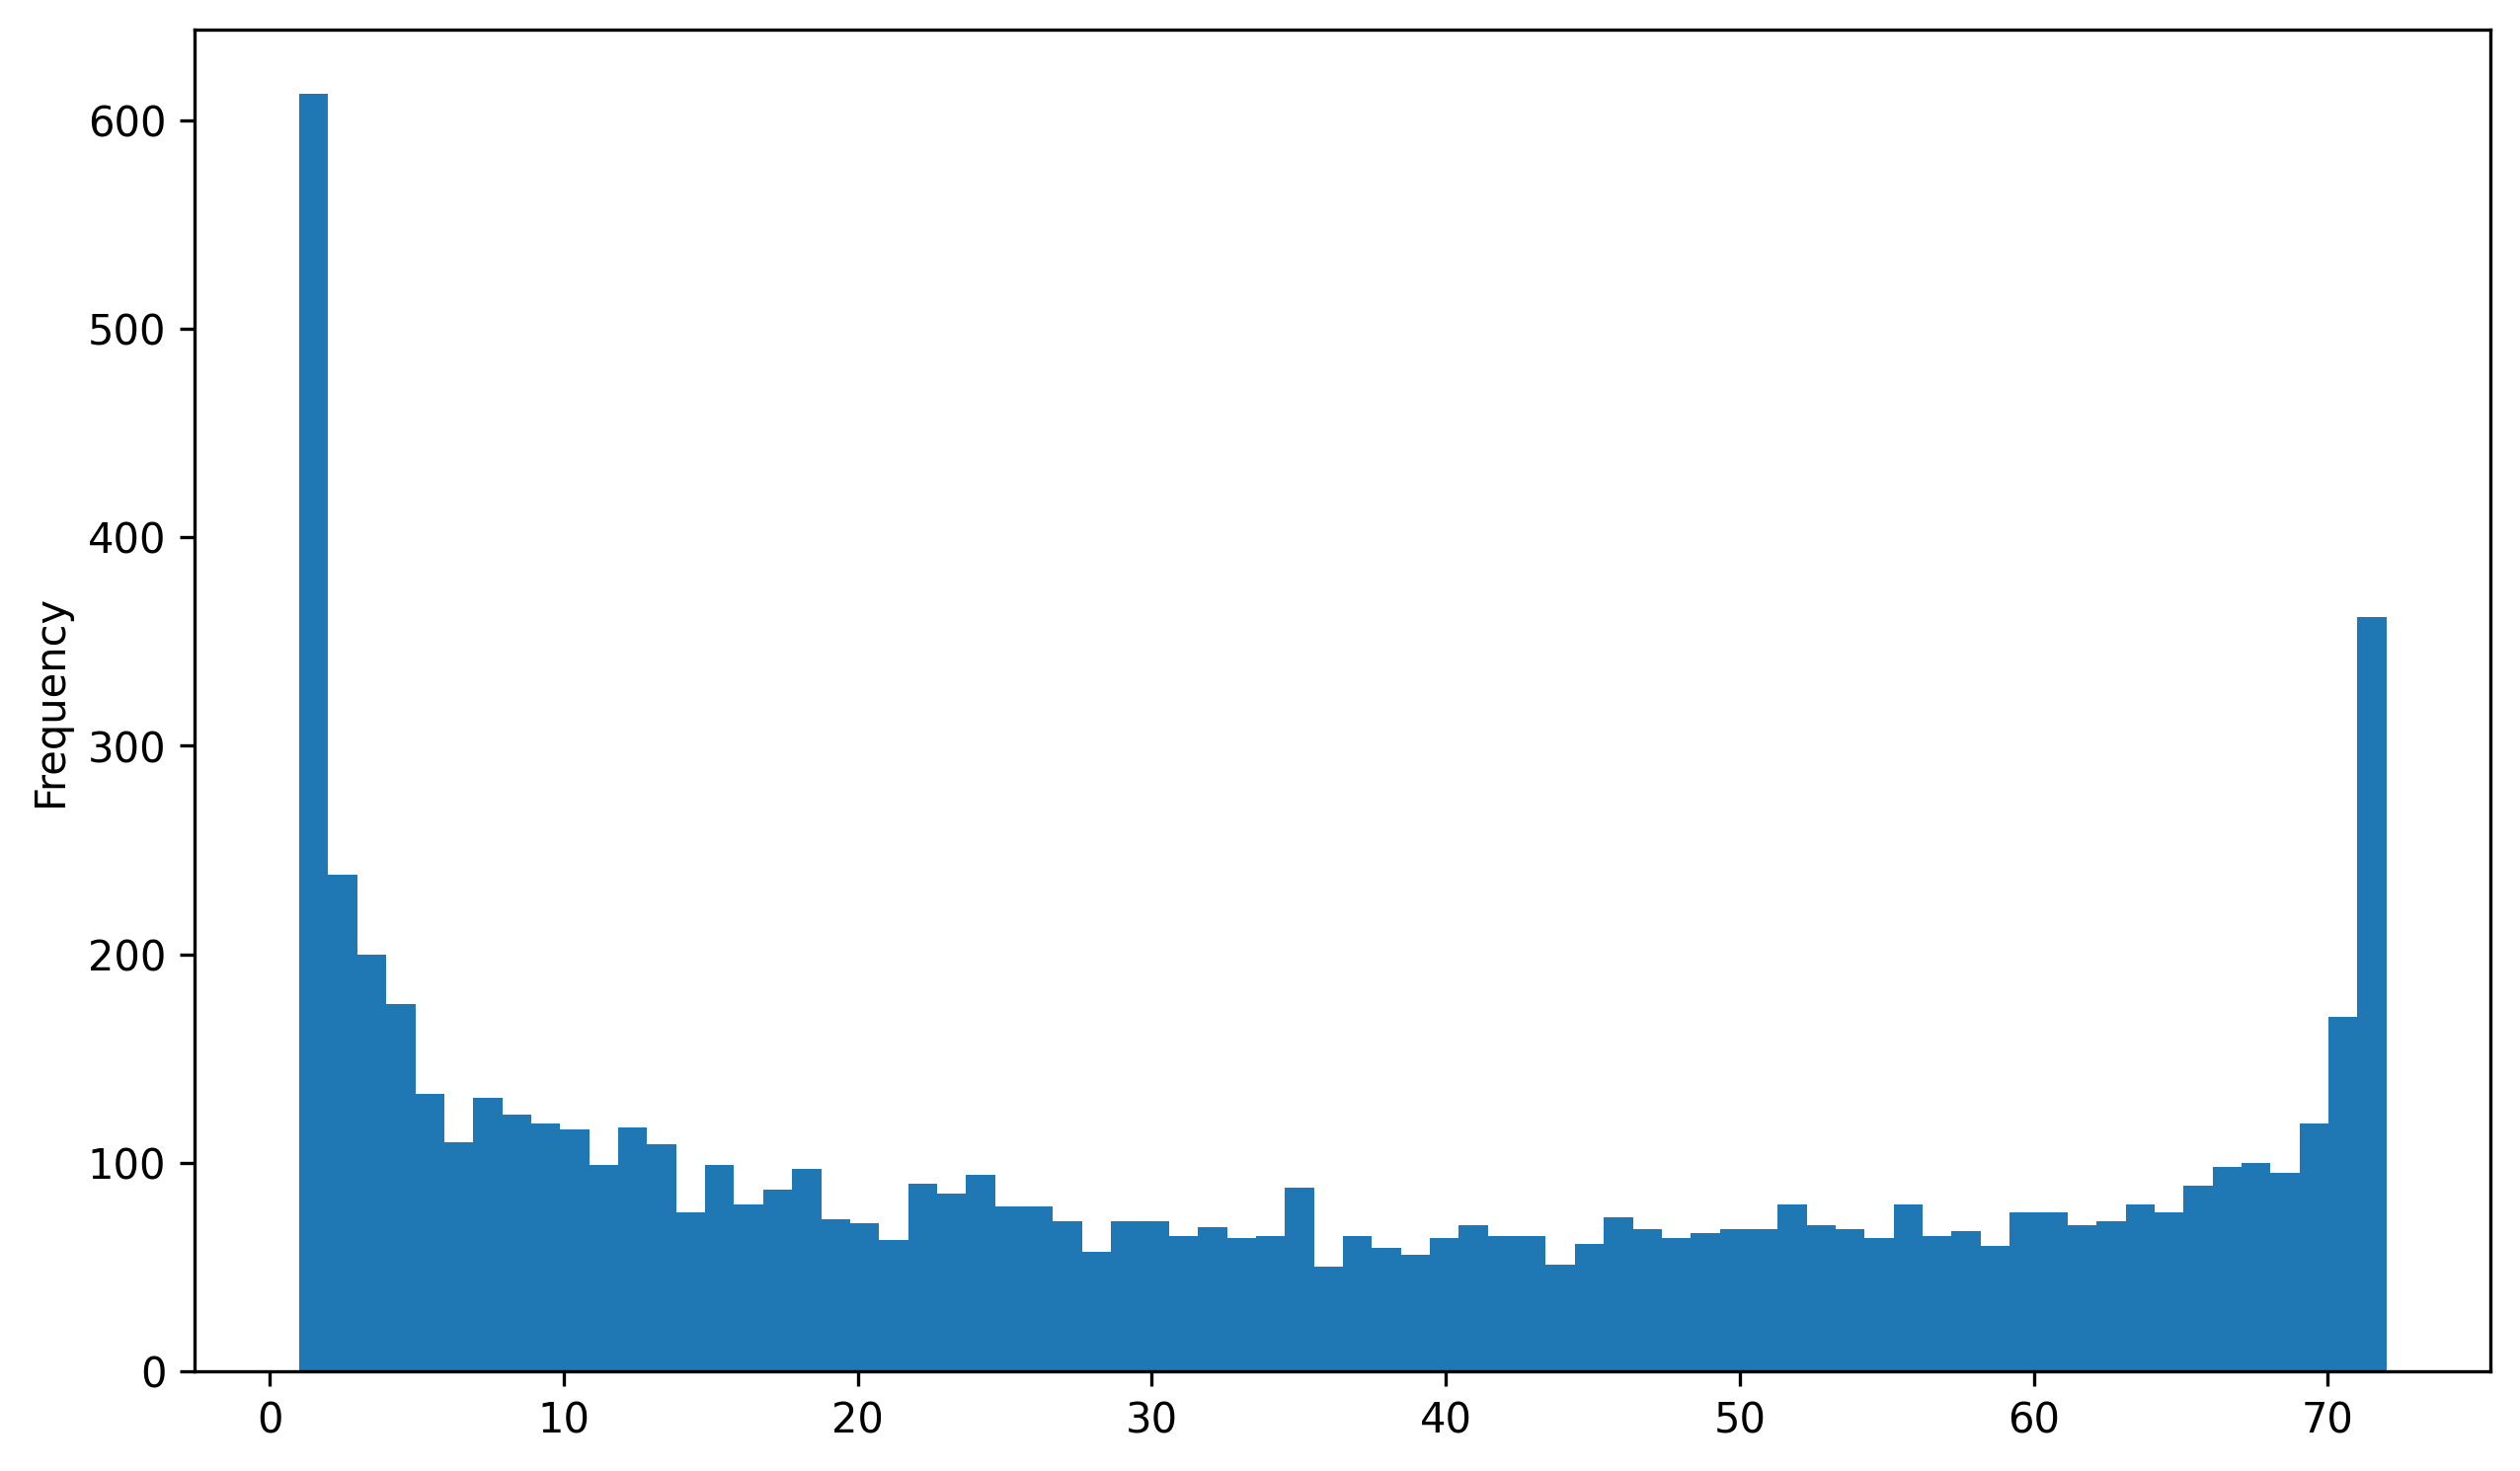

In [36]:
plt.figure(figsize=(10,6), dpi=300)
df.tenure.plot(kind= "hist", bins=72)

In [37]:
fig = px.histogram(df,x="tenure",color="churn",
             template="seaborn",nbins=72,opacity=.7)
fig.show()

**TASK: Now use the plotly documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

In [38]:
fig = px.histogram(df, x="tenure",barmode="group", facet_row="churn", facet_col="contract",
             category_orders={"contract": ["Month-to-month","One year", "Two year"], "churn": ["No","Yes"]},
             template="plotly")
fig.show()

**TASK: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

In [40]:
fig = px.scatter(df, x='monthlycharges',y='totalcharges', color="churn",
                 size='tenure',opacity=0.4)
fig.show()
# size='tenure' tenure dağılımının yoğunluğuna göre dairelerin büyüklüğünü ayarlıyor.

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [41]:
no_churn = df.groupby(['churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['churn','tenure']).count().transpose()['Yes']

In [42]:
100 * yes_churn / (no_churn+yes_churn)

tenure,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72
customerid,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,31.313131,32.478632,34.862385,31.578947,37.373737,35.0,29.885057,24.742268,26.027397,25.352113,26.984127,30.0,15.294118,24.468085,29.113924,18.987342,18.055556,21.052632,20.833333,22.222222,24.615385,27.536232,21.875,18.461538,17.045455,20.0,23.076923,22.033898,25.0,20.3125,20.0,21.538462,23.076923,11.764706,9.836066,16.216216,20.588235,14.0625,22.727273,14.705882,11.764706,10.0,20.0,19.117647,14.0625,12.5,12.307692,16.41791,13.333333,7.894737,10.526316,7.142857,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
gender,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,31.313131,32.478632,34.862385,31.578947,37.373737,35.0,29.885057,24.742268,26.027397,25.352113,26.984127,30.0,15.294118,24.468085,29.113924,18.987342,18.055556,21.052632,20.833333,22.222222,24.615385,27.536232,21.875,18.461538,17.045455,20.0,23.076923,22.033898,25.0,20.3125,20.0,21.538462,23.076923,11.764706,9.836066,16.216216,20.588235,14.0625,22.727273,14.705882,11.764706,10.0,20.0,19.117647,14.0625,12.5,12.307692,16.41791,13.333333,7.894737,10.526316,7.142857,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
seniorcitizen,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,31.313131,32.478632,34.862385,31.578947,37.373737,35.0,29.885057,24.742268,26.027397,25.352113,26.984127,30.0,15.294118,24.468085,29.113924,18.987342,18.055556,21.052632,20.833333,22.222222,24.615385,27.536232,21.875,18.461538,17.045455,20.0,23.076923,22.033898,25.0,20.3125,20.0,21.538462,23.076923,11.764706,9.836066,16.216216,20.588235,14.0625,22.727273,14.705882,11.764706,10.0,20.0,19.117647,14.0625,12.5,12.307692,16.41791,13.333333,7.894737,10.526316,7.142857,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
partner,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,31.313131,32.478632,34.862385,31.578947,37.373737,35.0,29.885057,24.742268,26.027397,25.352113,26.984127,30.0,15.294118,24.468085,29.113924,18.987342,18.055556,21.052632,20.833333,22.222222,24.615385,27.536232,21.875,18.461538,17.045455,20.0,23.076923,22.033898,25.0,20.3125,20.0,21.538462,23.076923,11.764706,9.836066,16.216216,20.588235,14.0625,22.727273,14.705882,11.764706,10.0,20.0,19.117647,14.0625,12.5,12.307692,16.41791,13.333333,7.894737,10.526316,7.142857,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
dependents,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,31.313131,32.478632,34.862385,31.578947,37.373737,35.0,29.885057,24.742268,26.027397,25.352113,26.984127,30.0,15.294118,24.468085,29.113924,18.987342,18.055556,21.052632,20.833333,22.222222,24.615385,27.536232,21.875,18.461538,17.045455,20.0,23.076923,22.033898,25.0,20.3125,20.0,21.538462,23.076923,11.764706,9.836066,16.216216,20.588235,14.0625,22.727273,14.705882,11.764706,10.0,20.0,19.117647,14.0625,12.5,12.307692,16.41791,13.333333,7.894737,10.526316,7.142857,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
phoneservice,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,31.313131,32.478632,34.862385,31.578947,37.373737,35.0,29.885057,24.742268,26.027397,25.352113,26.984127,30.0,15.294118,24.468085,29.113924,18.987342,18.055556,21.052632,20.833333,22.222222,24.615385,27.536232,21.875,18.461538,17.045455,20.0,23.076923,22.033898,25.0,20.3125,20.0,21.538462,23.076923,11.764706,9.836066,16.216216,20.588235,14.0625,22.727273,14.705882,11.764706,10.0,20.0,19.117647,14.06

In [44]:
# 100 * yes_churn / (no_churn)

In [45]:
churn_rate = 100 * yes_churn / (no_churn+yes_churn)

In [46]:
# let's cheer up our little dataframe
churn_rate.T[['customerid']]

,customerid
tenure,
1,61.990212
2,51.680672
3,47.000000
4,47.159091
5,48.120301
...,...
68,9.000000
69,8.421053
70,9.243697


In [47]:
# let's cheer up our little dataframe
churn_rate.T[['customerid']].style.background_gradient(subset="customerid", cmap="YlOrRd")

,customerid
tenure,
1,61.990212
2,51.680672
3,47.000000
4,47.159091
5,48.120301
6,36.363636
7,38.931298
8,34.146341
9,38.655462


**TASK: Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

In [48]:
fig = px.line(churn_rate.transpose()["customerid"], y='customerid',labels={"customerid":"Churn Rate"})
fig.show()

### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [49]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

In [50]:
df['tenure cohort'] = df['tenure'].apply(cohort)

In [51]:
df.head(10)[['tenure','tenure cohort']]#.sort_values(by="tenure")

,tenure,tenure cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

In [2]:
# dir(px.colors.qualitative)

In [52]:
df.tenure.map(churn_rate.T['customerid']) # to build a serie that shows churn ratings in rowwise

0       61.990212
1       18.461538
2       51.680672
3        9.836066
4       51.680672
          ...    
7027    24.468085
7028     1.657459
7029    31.313131
7030    47.159091
7031    14.606742
Name: tenure, Length: 7032, dtype: float64

In [53]:
df["churn_rate"] =df.tenure.map(churn_rate.T['customerid'])
df.churn_rate

0       61.990212
1       18.461538
2       51.680672
3        9.836066
4       51.680672
          ...    
7027    24.468085
7028     1.657459
7029    31.313131
7030    47.159091
7031    14.606742
Name: churn_rate, Length: 7032, dtype: float64

In [54]:
fig = px.scatter(df, x='monthlycharges',y='totalcharges', color="tenure cohort",
                 labels={"totalcharges":"Total Charges","monthlycharges":"Monthly Charges"},
                 size = "churn_rate",
                 opacity=0.8, color_discrete_sequence=px.colors.qualitative.Vivid)
fig.show()

**TASK: Create a count plot showing the churn count per cohort.**

In [55]:
fig = px.histogram(df, x="tenure cohort",barmode="group",color="churn",template="plotly")
fig.show()

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

In [56]:
fig = px.histogram(df, x="tenure cohort",barmode="group", color="churn", facet_col="contract",
                          template="plotly")
fig.show()

In [ ]:
# Not ekle

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting. Feel free to add any other supervised learning models to your comparisons!**


## Single Decision Tree

**TASK : Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [57]:
X = df.drop(['churn','customerid'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['churn']

<IPython.core.display.Javascript object>

**TASK: Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101 in the solutions notebook/video.**

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [60]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Logistic Regression

In [62]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Datamızda 0 ve 1 lerden oluşan columns lar olduğu için MinMaxScaler() kullandık.
# ??? get_dummies kullanılan df ler için StandardScaler uygun olmaz diyebiliriz. Çünkü get_dummies kategorik verileri 0 ve 1 lere dönüştürüyor.

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

In [64]:
log_model=LogisticRegression(max_iter=5000)
log_model.fit(X_train_scaled, y_train)
y_pred=log_model.predict(X_test_scaled)
y_pred_dummy = pd.get_dummies(y_pred)

<IPython.core.display.Javascript object>

In [65]:
print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[959  93]
 [163 192]]
-------------------------------------------------------
              precision    recall  f1-score   support

          No       0.85      0.91      0.88      1052
         Yes       0.67      0.54      0.60       355

    accuracy                           0.82      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.81      0.82      0.81      1407



In [3]:
# talk to customer if they have enough bugdet for adds or not.

# KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)

In [71]:
print(confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[901 151]
 [168 187]]
--------------------------------------------------------
              precision    recall  f1-score   support

          No       0.84      0.86      0.85      1052
         Yes       0.55      0.53      0.54       355

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.77      0.77      0.77      1407



# SVN

In [72]:
from sklearn.svm import SVC, LinearSVC

In [73]:
svm_model = LinearSVC(max_iter=5000)
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)

**TASK: Decision Tree Perfomance. Complete the following tasks:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. OPTIONAL: Plot your tree, note, the tree could be huge depending on your pruning, so it may crash your notebook if you display it with plot_tree.

In [74]:
print(confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[966  86]
 [165 190]]
--------------------------------------------------------
              precision    recall  f1-score   support

          No       0.85      0.92      0.89      1052
         Yes       0.69      0.54      0.60       355

    accuracy                           0.82      1407
   macro avg       0.77      0.73      0.74      1407
weighted avg       0.81      0.82      0.81      1407



## DT

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
preds = dt.predict(X_test)

In [77]:
print(confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[966  86]
 [165 190]]
--------------------------------------------------------
              precision    recall  f1-score   support

          No       0.85      0.92      0.89      1052
         Yes       0.69      0.54      0.60       355

    accuracy                           0.82      1407
   macro avg       0.77      0.73      0.74      1407
weighted avg       0.81      0.82      0.81      1407



In [80]:
imp_feature = pd.DataFrame(data=dt.feature_importances_,index=X.columns, columns=['Feature Importance']).sort_values("Feature Importance",ascending=False)
imp_feature

<IPython.core.display.Javascript object>

,Feature Importance
churn_rate,0.186946
monthlycharges,0.182132
totalcharges,0.175629
internetservice_Fiber optic,0.106856
tenure,0.064488
paymentmethod_Electronic check,0.023098
gender_Male,0.021117
onlinesecurity_Yes,0.019501
paperlessbilling_Yes,0.018501
multiplelines_Yes,0.018034


In [79]:
imp_feature.style.background_gradient(subset="Feature Importance", cmap="YlOrRd") # i have learned so i should use

,Feature Importance
churn_rate,0.186946
monthlycharges,0.182132
totalcharges,0.175629
internetservice_Fiber optic,0.106856
tenure,0.064488
paymentmethod_Electronic check,0.023098
gender_Male,0.021117
onlinesecurity_Yes,0.019501
paperlessbilling_Yes,0.018501
multiplelines_Yes,0.018034


In [81]:
imp_feature= imp_feature.sort_values("Feature Importance")

In [82]:
fig = px.histogram(imp_feature.sort_values('Feature Importance'),
                   x=imp_feature.sort_values('Feature Importance').index,y='Feature Importance',
                   template="plotly")
fig.show()

## Random Forest

**TASK: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
preds = rf.predict(X_test)

In [85]:
print(confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[966  86]
 [165 190]]
--------------------------------------------------------
              precision    recall  f1-score   support

          No       0.85      0.92      0.89      1052
         Yes       0.69      0.54      0.60       355

    accuracy                           0.82      1407
   macro avg       0.77      0.73      0.74      1407
weighted avg       0.81      0.82      0.81      1407



## Boosted Trees

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [86]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

## Adaboost

In [87]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train,y_train)
preds = ada_model.predict(X_test)

In [88]:
print(confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[966  86]
 [165 190]]
--------------------------------------------------------
              precision    recall  f1-score   support

          No       0.85      0.92      0.89      1052
         Yes       0.69      0.54      0.60       355

    accuracy                           0.82      1407
   macro avg       0.77      0.73      0.74      1407
weighted avg       0.81      0.82      0.81      1407



## Gradient Boosting

In [89]:
grad_model = GradientBoostingClassifier()
grad_model.fit(X_train,y_train)
preds = grad_model.predict(X_test)

In [90]:
print(confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[966  86]
 [165 190]]
--------------------------------------------------------
              precision    recall  f1-score   support

          No       0.85      0.92      0.89      1052
         Yes       0.69      0.54      0.60       355

    accuracy                           0.82      1407
   macro avg       0.77      0.73      0.74      1407
weighted avg       0.81      0.82      0.81      1407



## XGBoost

In [4]:
#conda install xgboost

In [91]:
from xgboost import XGBClassifier

In [92]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
preds = xgb_model.predict(X_test)

C:\Users\Ertuğrul\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

[22:20:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [93]:
print(confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[966  86]
 [165 190]]
--------------------------------------------------------
              precision    recall  f1-score   support

          No       0.85      0.92      0.89      1052
         Yes       0.69      0.54      0.60       355

    accuracy                           0.82      1407
   macro avg       0.77      0.73      0.74      1407
weighted avg       0.81      0.82      0.81      1407



In [5]:
149/408

0.36519607843137253

**TASK: Analyze your results, which model performed best for you?**

* We have used several algorithms in first iteration and because of imbalaced label our recall and precision scores too bad to predict churns.
* Logistic model with label weight balance has realtively good scores in order to predict churns, however model also predicts non-churns as churns at a ratio 3 to 1.
* Btw we haven't implement cross validation and grid search yet, I will use logistic model and xgboost on second iteration. I will also perform over and under sampling overdata to overcome unbalace issuies.

### Great job!